# Taller: análisis de datos de videojuegos

Taller teorico y practico para hacer análisis de datos con una tabla estructurada. 

• **¿Qué librerías son necesarias para trabajar con datos y visualización?**

Pandas permite trabajar con tablas, leer formatos y limpiar datos además de hacer algunos gráficos. Mientras que seaborn, matplotlib permiten hacer gráficas poderosas y con alta personalización. 

In [9]:
# IMPORTACIÓN DE LIBRERÍAS

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

• **¿Cómo se carga un conjunto de datos en Python?**

Es importaante tener la ruta y saber el tipo de archivo para usar un método de pandas, posteriormente si se está en jupyter lab se sube directo al entorno de trabajo y la ruta solo será el nombre del archivo.

In [11]:
# LECTURA DE TABLA

ruta = "C:/Users/Julian/Documents/Ejecicios del botcamp/Ventas_Videojuegos.xlsx"
juegos = pd.read_excel(ruta)
juegos

,Nombre,Plataforma,Año,Genero,Editorial,Ventas NA,Ventas EU,Ventas JP,Ventas Otros,Ventas Global
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16321,Farming 2017 - The Simulation,PS4,2016,Simulation,UIG Entertainment,0.00,0.01,0.00,0.00,0.01
16322,Rugby Challenge 3,XOne,2016,Sports,Alternative Software,0.00,0.01,0.00,0.00,0.01
16323,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016,Action,dramatic create,0.00,0.00,0.01,0.00,0.01
16324,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01


• **¿Qué información podemos obtener al ver las primeras filas del dataset?**
- El indice, cantidad de filas y columnas, el nombre de cada columna y como se constituyen los datos.

In [13]:
# TAMAÑO DE LA TABLA

juegos.shape, juegos.size

((16326, 10), 163260)

• **¿Qué tipos de datos están presentes en nuestro conjunto de datos?**
- Se pueden ver datos de texto como objetos, datos enteros como int64 y decimales como float64.

In [15]:
# INFORMACIÓN COLUMNAS 

juegos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16326 entries, 0 to 16325
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Nombre         16326 non-null  object 
 1   Plataforma     16326 non-null  object 
 2   Año            16326 non-null  int64  
 3   Genero         16326 non-null  object 
 4   Editorial      16290 non-null  object 
 5   Ventas NA      16326 non-null  float64
 6   Ventas EU      16326 non-null  float64
 7   Ventas JP      16326 non-null  float64
 8   Ventas Otros   16326 non-null  float64
 9   Ventas Global  16326 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.2+ MB


- Se pasaran los géneros y plataformas a categoricas. 

In [17]:
# PASAR A CATEGORICAS GENERO Y PLATAFORMA

juegos["Plataforma"] = juegos["Plataforma"].astype("category")
juegos["Genero"] = juegos["Genero"].astype("category")

#### DUPLICADOS

• **¿Por qué es importante eliminar los duplicados en un conjunto de datos?**

Para que no hayan redundancias en los cálculos y sean más fiables los análisis.

• **¿Cómo podemos verificar si quedan duplicados?**

Con metodos de pandas de duplicated y sumandolos.

In [21]:
# DUPLICADOS 

duplicados = juegos.duplicated().sum()
duplicados

0

#### NULOS

• ¿Qué métodos existen para manejar valores nulos?

In [24]:
# CONTEO DE NULOS

juegos.isna().sum().sort_values(ascending = False).head(5)

Editorial     36
Nombre         0
Plataforma     0
Año            0
Genero         0
dtype: int64

- Se imputara editorial con la moda. 

In [26]:
# IMPUTAR EDITORIAL

juegos["Editorial"] = juegos["Editorial"].fillna("Electronic Arts")

In [27]:
# CONTEO DE NULOS

juegos.isna().sum().sort_values(ascending = False).head(5)

Nombre        0
Plataforma    0
Año           0
Genero        0
Editorial     0
dtype: int64

- Ya no hay nulos.

In [29]:
# TABLA DE FRECUENCIA POR PORCENTAJE

generos = juegos.groupby("Genero")["Genero"].count().sort_values(ascending = False)
generos = (generos / len(juegos) * 100).round(2)
generos

C:\Users\Julian\AppData\Local\Temp\ipykernel_2340\2975623919.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  generos = juegos.groupby("Genero")["Genero"].count().sort_values(ascending = False)


Genero
Action          19.93
Sports          14.11
Misc            10.47
Role-Playing     9.01
Shooter          7.85
Adventure        7.82
Racing           7.51
Platform         5.37
Simulation       5.21
Fighting         5.12
Strategy         4.11
Puzzle           3.50
Name: Genero, dtype: float64

In [30]:
# ESTADISTICAS GENERALES

juegos.describe(include = "all")

,Nombre,Plataforma,Año,Genero,Editorial,Ventas NA,Ventas EU,Ventas JP,Ventas Otros,Ventas Global
count,16326,16326,16326.000000,16326,16326,16326.000000,16326.000000,16326.000000,16326.000000,16326.000000
unique,11359,31,NaN,12,576,NaN,NaN,NaN,NaN,NaN
top,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,12,2132,NaN,3253,1375,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2006.405611,NaN,NaN,0.265415,0.147563,0.078667,0.048327,0.540247
std,NaN,NaN,5.828189,NaN,NaN,0.821616,0.508780,0.311566,0.189891,1.565779
min,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.480000


In [31]:
# MEDIAS POR COLUMNA 

numericas = juegos.select_dtypes(include = ["float64","int64"]).columns
for columna in juegos.columns:
    if columna in numericas:
        print(juegos[columna].mean(), columna)

2006.4056106823473 Año
0.2654146759769692 Ventas NA
0.14756339581036382 Ventas EU
0.0786665441626853 Ventas JP
0.048327208134264374 Ventas Otros
0.5402468455224795 Ventas Global


In [32]:
# MEDIANAS POR COLUMNA 

numericas = juegos.select_dtypes(include = ["float64","int64"]).columns
for columna in juegos.columns:
    if columna in numericas:
        print(juegos[columna].median(), columna)

2007.0 Año
0.08 Ventas NA
0.02 Ventas EU
0.0 Ventas JP
0.01 Ventas Otros
0.17 Ventas Global


In [33]:
# MODAS POR COLUMNA 

numericas = juegos.select_dtypes(include = ["float64","int64"]).columns
for columna in juegos.columns:
    if columna in numericas:
        print(juegos[columna].mode())

0    2009
Name: Año, dtype: int64
0    0.0
Name: Ventas NA, dtype: float64
0    0.0
Name: Ventas EU, dtype: float64
0    0.0
Name: Ventas JP, dtype: float64
0    0.0
Name: Ventas Otros, dtype: float64
0    0.02
Name: Ventas Global, dtype: float64


In [34]:
# ESTADISTICAS GENERALES

juegos.describe(include = "all")

,Nombre,Plataforma,Año,Genero,Editorial,Ventas NA,Ventas EU,Ventas JP,Ventas Otros,Ventas Global
count,16326,16326,16326.000000,16326,16326,16326.000000,16326.000000,16326.000000,16326.000000,16326.000000
unique,11359,31,NaN,12,576,NaN,NaN,NaN,NaN,NaN
top,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,12,2132,NaN,3253,1375,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2006.405611,NaN,NaN,0.265415,0.147563,0.078667,0.048327,0.540247
std,NaN,NaN,5.828189,NaN,NaN,0.821616,0.508780,0.311566,0.189891,1.565779
min,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.480000


### GRÁFICOS

In [36]:
# INTERVALOS DE LA TABLA

import numpy as np
n = len(juegos)
k = 1 + (10 /3) * np.log10(n)
k = int(k.round(0))
k

15

In [37]:
# INTERVALOS DE FRECUENCIA EN VENTAS 

frecuencia = pd.Series(pd.cut(
    x = juegos["Ventas Global"],
    bins = k,
    include_lowest = True
)).value_counts(sort=False)
frecuencia

Ventas Global
(-0.0737, 5.525]    16166
(5.525, 11.041]       109
(11.041, 16.556]       28
(16.556, 22.071]        9
(22.071, 27.587]        4
(27.587, 33.102]        7
(33.102, 38.617]        1
(38.617, 44.133]        1
(44.133, 49.648]        0
(49.648, 55.163]        0
(55.163, 60.679]        0
(60.679, 66.194]        0
(66.194, 71.709]        0
(71.709, 77.225]        0
(77.225, 82.74]         1
Name: count, dtype: int64

In [38]:
# FRECUENCIA PORCENTUAL ENTRE INTERVALOS

porcentual = pd.Series(pd.cut(
    x = juegos["Ventas Global"],
    bins = k,
    include_lowest = True
)).value_counts(normalize=True, sort=False).round(2)
porcentual

Ventas Global
(-0.0737, 5.525]    0.99
(5.525, 11.041]     0.01
(11.041, 16.556]    0.00
(16.556, 22.071]    0.00
(22.071, 27.587]    0.00
(27.587, 33.102]    0.00
(33.102, 38.617]    0.00
(38.617, 44.133]    0.00
(44.133, 49.648]    0.00
(49.648, 55.163]    0.00
(55.163, 60.679]    0.00
(60.679, 66.194]    0.00
(66.194, 71.709]    0.00
(71.709, 77.225]    0.00
(77.225, 82.74]     0.00
Name: proportion, dtype: float64

In [39]:
# FRECUENCIA ABSOLUTA Y PORCENTUAL 

dist_frec_cuantitativas = pd.DataFrame({'Frecuencia': frecuencia, 'Porcentual (%)': porcentual})
dist_frec_cuantitativas

,Frecuencia,Porcentual (%)
Ventas Global,,
"(-0.0737, 5.525]",16166,0.99
"(5.525, 11.041]",109,0.01
"(11.041, 16.556]",28,0.00
"(16.556, 22.071]",9,0.00
"(22.071, 27.587]",4,0.00
"(27.587, 33.102]",7,0.00
"(33.102, 38.617]",1,0.00
"(38.617, 44.133]",1,0.00
"(44.133, 49.648]",0,0.00


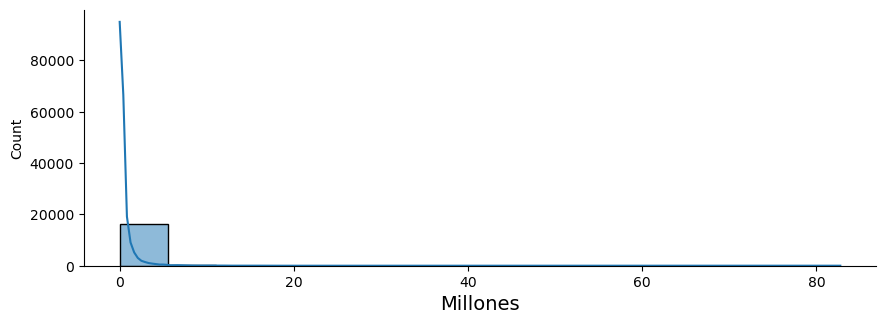

In [40]:
# HISTOGRAMA CON LAS FRECUENCIAS 

ax = sns.displot(juegos["Ventas Global"], kde = True, bins = 15)
ax.figure.set_size_inches(10, 3)
ax.set_titles('Distribución de Frecuencias - Altura', fontsize=18)
ax.set_xlabels('Millones', fontsize=14);

C:\Users\Julian\AppData\Local\Temp\ipykernel_2340\3906682869.py:4: UserWarning: 
The palette list has fewer values (8) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x= generos.index, y= generos.values, hue= generos.index, palette=colores_personalizados)


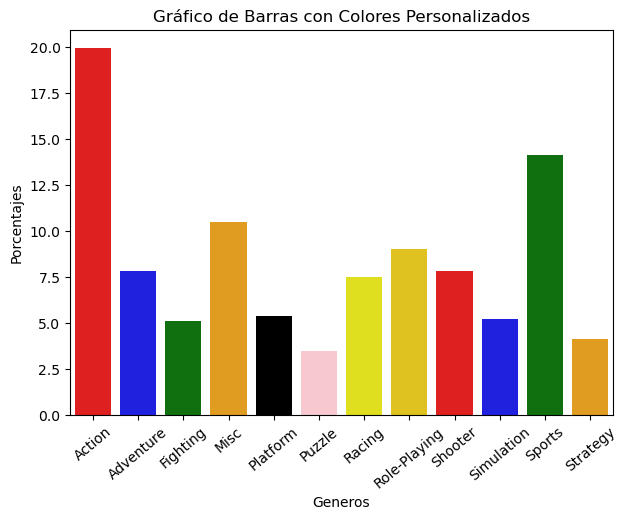

In [41]:
# GRÁFICO DE BARRAS POR GÉNERO 
colores_personalizados = ['red', 'blue', 'green', 'orange', "black", "pink", "yellow", "gold"]
plt.figure(figsize=(7, 5))
sns.barplot(x= generos.index, y= generos.values, hue= generos.index, palette=colores_personalizados)
plt.title('Gráfico de Barras con Colores Personalizados')
plt.xlabel('Generos')
plt.ylabel('Porcentajes')
plt.xticks(rotation=40)
plt.show()